In [2]:
#Project 9

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ramenFile = 'ramen-ratings.csv'
lifeFile = 'life_expectancy_years.csv'
ramen = pd.read_csv(ramenFile)
life = pd.read_csv(lifeFile)
happyFile = 'world-happiness-report-2019.csv'
happy = pd.read_csv(happyFile)

#Print only the first 20 in the table
ramen.head(20)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [4]:
#Print only the first 20 in the table for life span
life.head(20)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
6,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
7,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,80.3,80.5,80.7,80.9,81.1,81.3,81.4,81.5,81.7,81.8


In [5]:
#2018 Life spans
countries = life.iloc[:, 0]
lifee = life.iloc[:, 219]
#The countries = lifeee
print(countries)
#2018 life spans = lifee
print(lifee)

0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                             Austria
10                         Azerbaijan
11                            Bahamas
12                            Bahrain
13                         Bangladesh
14                           Barbados
15                            Belarus
16                            Belgium
17                             Belize
18                              Benin
19                             Bhutan
20                            Bolivia
21             Bosnia and Herzegovina
22                           Botswana
23                             Brazil
24                             Brunei
25                           Bulgaria
26          

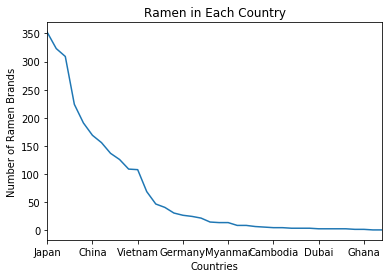

In [6]:
#Countries
ramencountries = ramen.iloc[:, 4]



#Count number of different ramens per country
# size = ramen.groupby('Country').size()
# size

plt.xlabel('Countries')
plt.ylabel('Number of Ramen Brands')
plt.title('Ramen in Each Country')
ramen['Country'].value_counts().plot()
plt.show()

In [ ]:
#Compare Japan ramen ratings vs US ratings

if (ramen['Country'] == 'Japan'):
    print("hi")




ValueError: shape mismatch: objects cannot be broadcast to a single shape

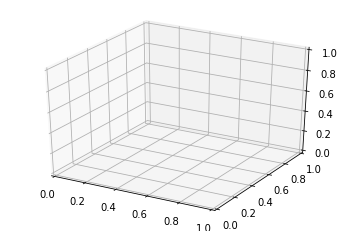

In [15]:
happy.head(20)

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=ramen['Brand'], ys=ramen['Country'], zs=life['2018'])
# plt.title("Ramen")
# plt.show()

#Ramen, Country, Life



#Happiness, Country, Ramen



## 